In [257]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('cleaned.csv')

# Create a summary table
summary_table = df.describe()

# Add the median and IQR columns
summary_table.loc['median'] = df.median()

summary_table

,cabinet_proportion,seats_proportion,caretaker,sq_cabinet,sq_pm,miw_proportion,banzhaf,shapley,splus,left_rightx,...,enpp,mingov,bicameral,lag_largest_parl,lag_largest_cab,B,B_star,C,D,E
count,657.000000,657.000000,657.000000,644.000000,644.000000,657.000000,657.000000,657.000000,657.000000,605.000000,...,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,0.129376,0.129376,0.060883,0.327640,0.128882,0.129376,0.129328,0.129337,0.129289,5.052198,...,4.915088,0.324201,0.544901,0.126332,0.126332,0.398782,0.057839,0.048706,0.249619,0.302892
std,0.226728,0.123545,0.239297,0.469718,0.335330,0.108112,0.144730,0.140964,0.140634,2.305746,...,1.587204,0.468432,0.498359,0.332476,0.332476,0.490021,0.233616,0.215417,0.433123,0.459859
min,0.000000,0.001587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366667,...,2.557285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035176,0.000000,0.000000,0.000000,0.046326,0.027027,0.027778,0.029893,3.158889,...,3.712816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.080402,0.000000,0.000000,0.000000,0.100000,0.076923,0.073449,0.074756,5.581111,...,4.733491,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.190476,0.193333,0.000000,1.000000,0.000000,0.200000,0.166667,0.166667,0.172758,6.944444,...,5.544385,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,0.861111,0.833333,0.791459,9.888889,...,9.050684,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,0.000000,0.080402,0.000000,0.000000,0.000000,0.100000,0.076923,0.073449,0.074756,5.581111,...,4.733491,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


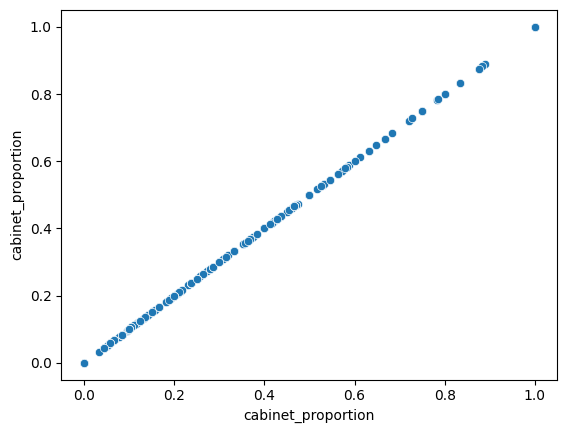

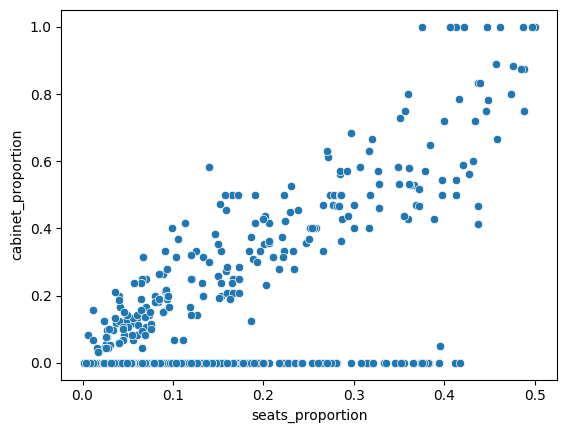

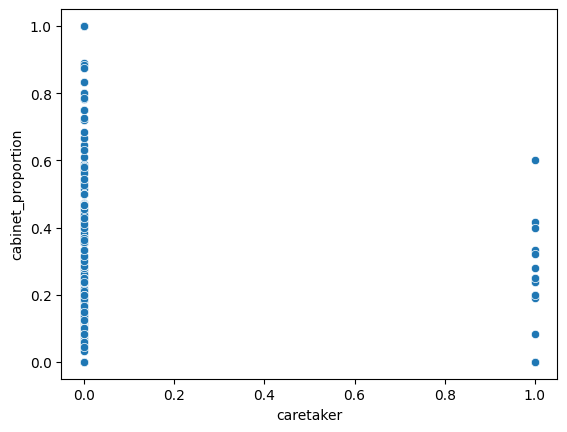

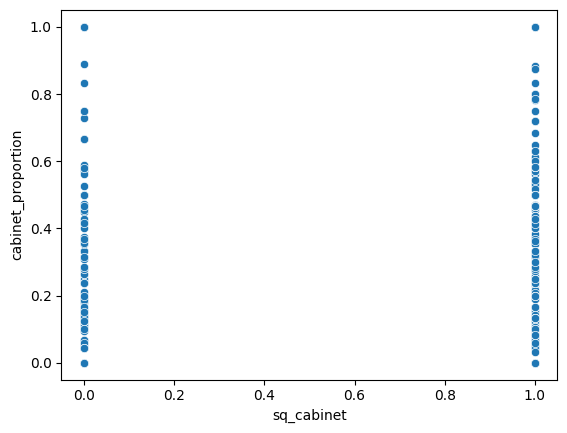

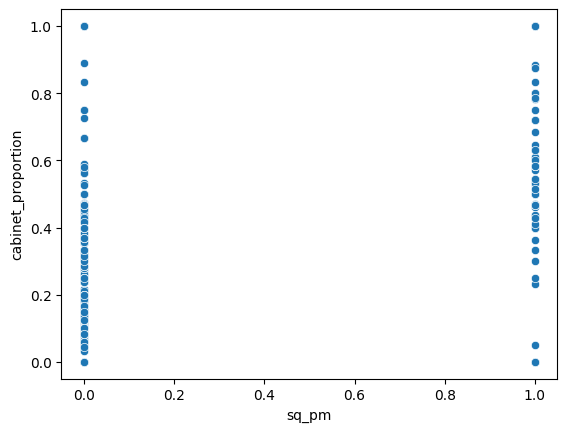

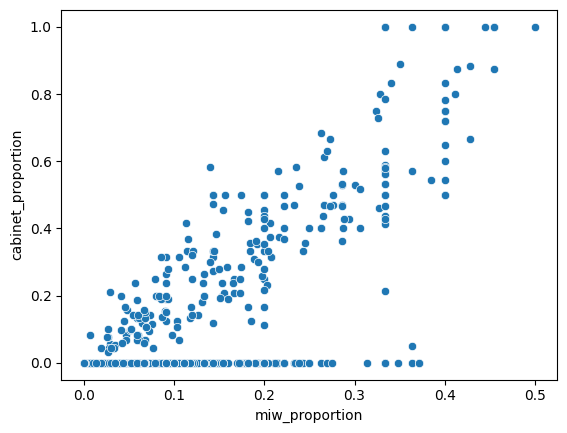

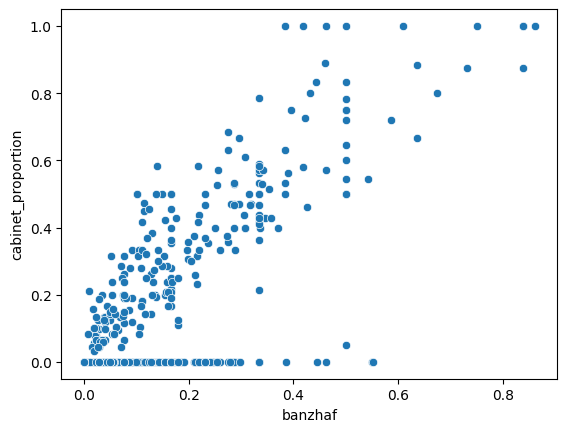

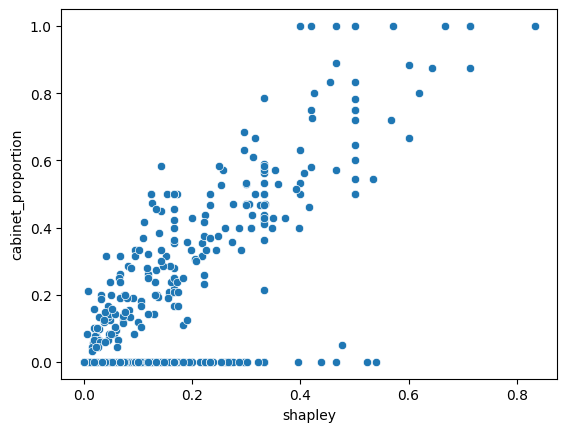

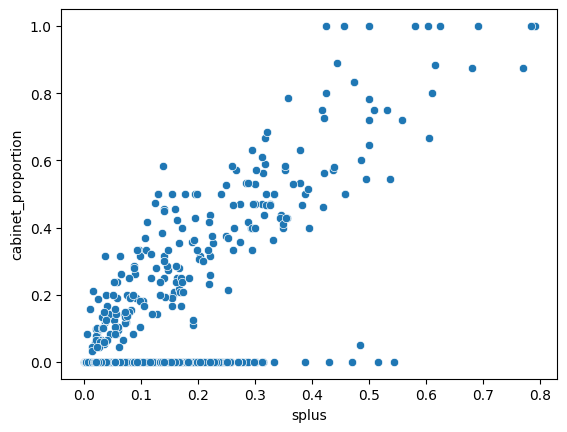

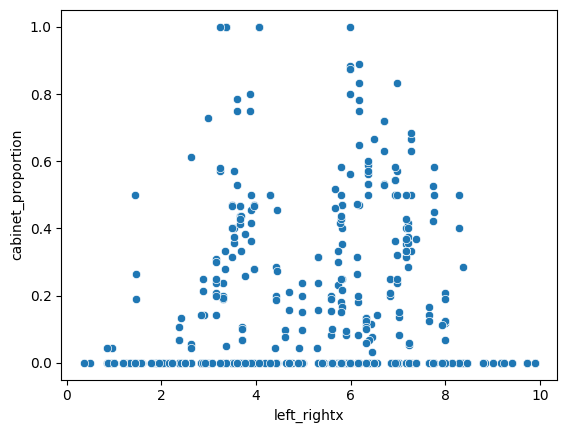

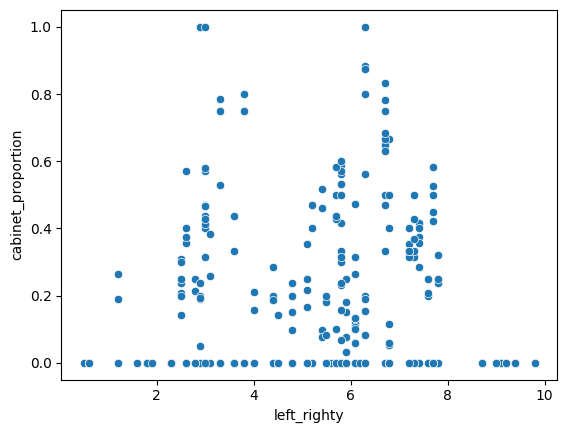

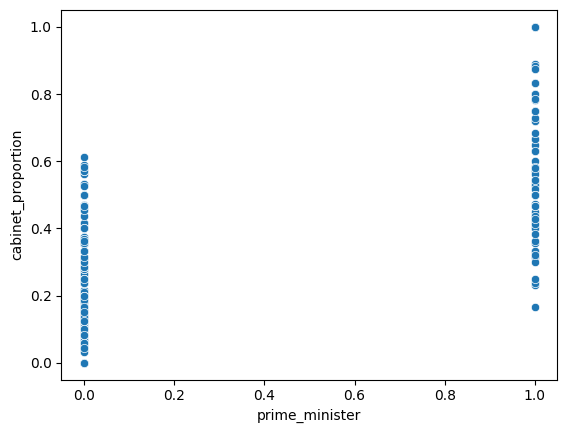

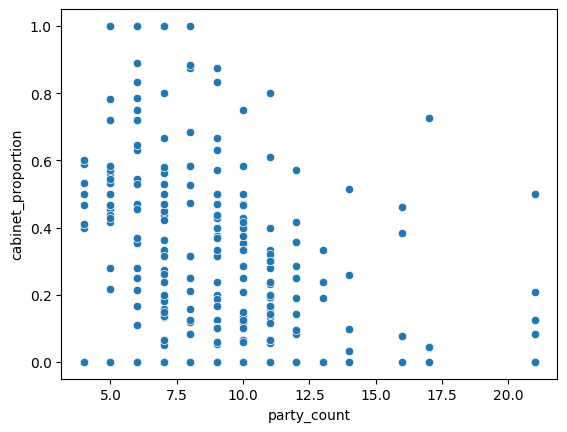

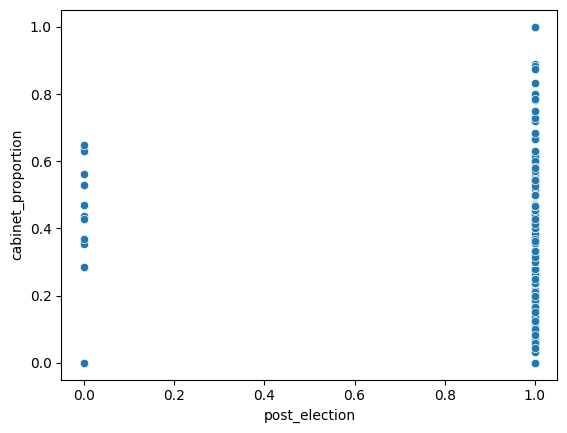

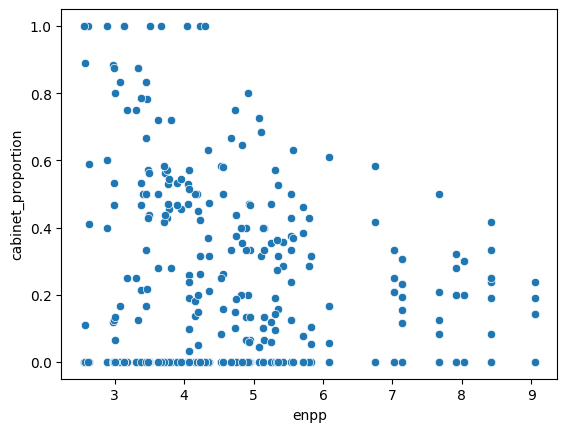

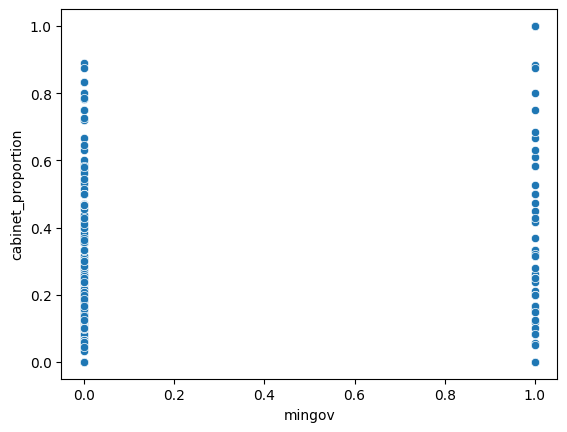

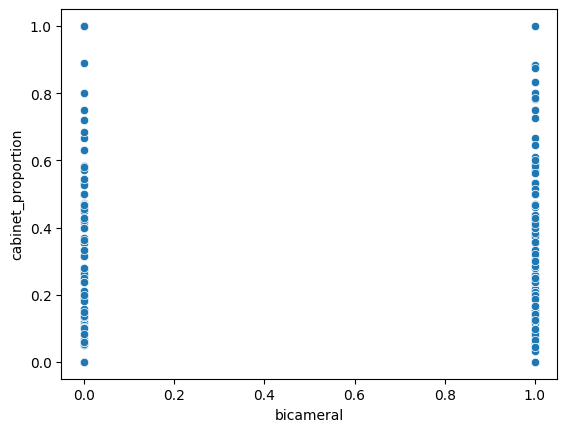

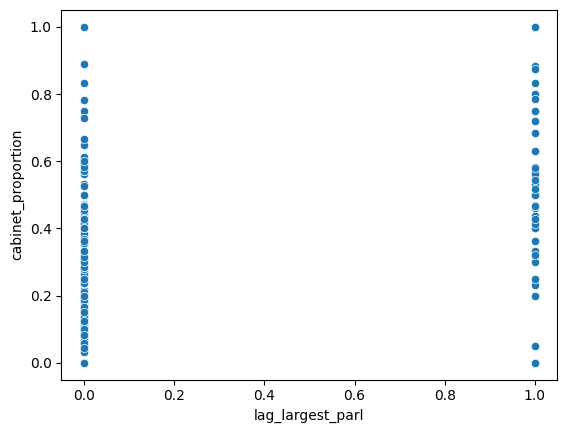

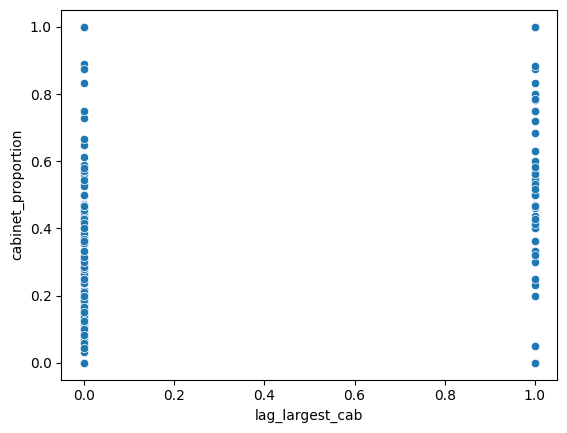

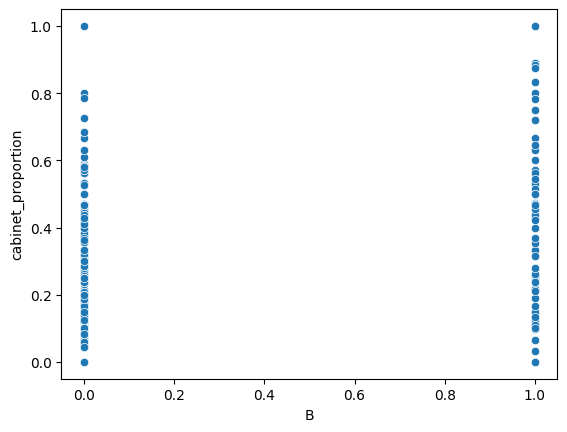

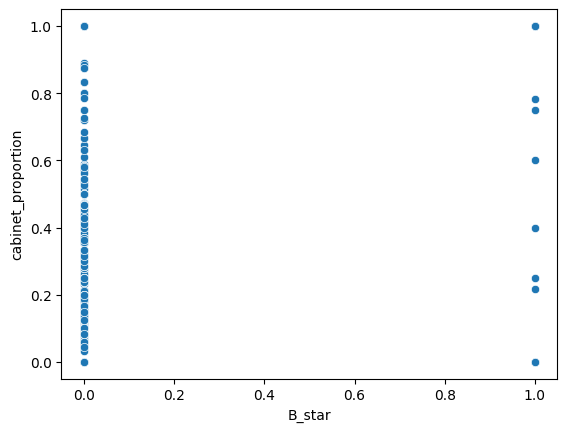

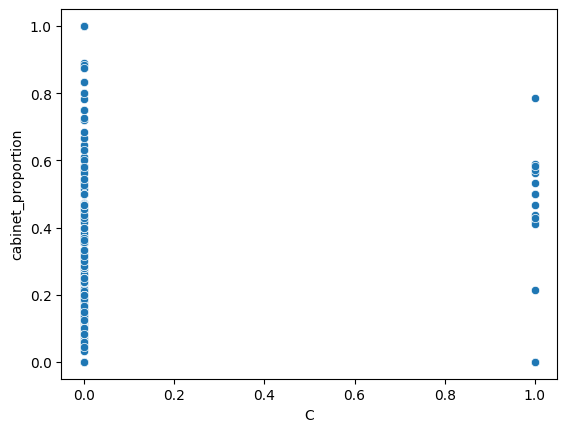

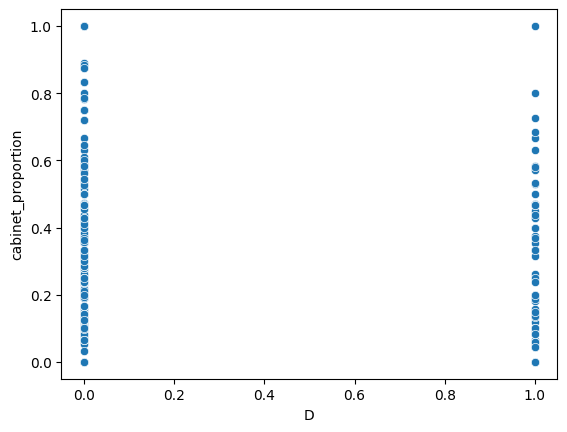

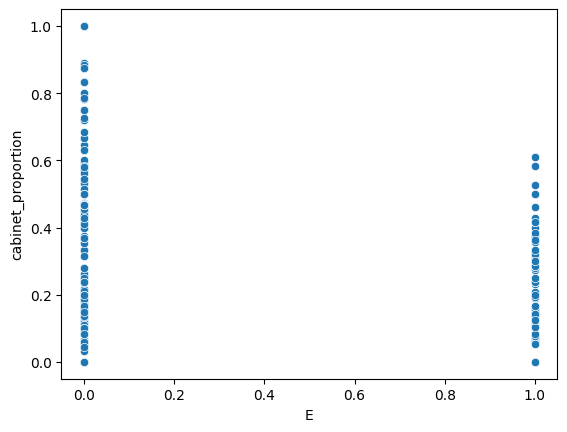

In [258]:
import matplotlib.pyplot as plt

# Define the Dependent Variable
target = 'cabinet_proportion'
y = df[target]
X = df

# Print a plot of each X variable against the Y variable
for col in X.columns:
    sns.scatterplot(x=X[col], y=y)
    plt.show()

In [259]:
from sklearn.linear_model import Lasso
import seaborn as sns

corr = X.corr()
corr_abs = corr.abs()

# Get the features with the highest multicollinearity
features_with_highest_multicollinearity = corr_abs.unstack().sort_values(ascending=False).drop_duplicates().head(15)

# Remove variables that are correlated to themselves
features_with_highest_multicollinearity = features_with_highest_multicollinearity[features_with_highest_multicollinearity.index.get_level_values(0) != features_with_highest_multicollinearity.index.get_level_values(1)]

# Print the features with the highest multicollinearity
print(features_with_highest_multicollinearity)

shapley           banzhaf             0.995847
splus             shapley             0.994279
                  banzhaf             0.991502
shapley           miw_proportion      0.971328
left_righty       left_rightx         0.966072
splus             miw_proportion      0.960099
banzhaf           miw_proportion      0.957035
splus             seats_proportion    0.918087
miw_proportion    seats_proportion    0.914404
shapley           seats_proportion    0.907868
banzhaf           seats_proportion    0.891292
lag_largest_parl  lag_largest_cab     0.806935
enpp              E                   0.800973
sq_pm             lag_largest_cab     0.792539
dtype: float64


In [260]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
# Convert the standardized array back to a DataFrame
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)
X_standardized.describe()

,cabinet_proportion,seats_proportion,caretaker,sq_cabinet,sq_pm,miw_proportion,banzhaf,shapley,splus,left_rightx,...,enpp,mingov,bicameral,lag_largest_parl,lag_largest_cab,B,B_star,C,D,E
count,6.570000e+02,6.570000e+02,6.570000e+02,6.440000e+02,6.440000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.050000e+02,...,6.570000e+02,657.000000,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02
mean,1.189645e-16,1.081496e-17,1.081496e-17,1.654991e-17,1.048161e-16,3.785235e-17,-1.243720e-16,4.866731e-17,-6.218601e-17,1.761676e-16,...,-3.136338e-16,0.000000,3.920422e-17,4.325983e-17,3.514861e-17,7.570471e-17,9.463088e-18,-2.703739e-17,5.407479e-17,1.243720e-16
std,1.000762e+00,1.000762e+00,1.000762e+00,1.000777e+00,1.000777e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000827e+00,...,1.000762e+00,1.000762,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00
min,-5.710575e-01,-1.035140e+00,-2.546170e-01,-6.980673e-01,-3.846428e-01,-1.197594e+00,-8.942640e-01,-9.182129e-01,-9.200320e-01,-2.033792e+00,...,-1.486639e+00,-0.692625,-1.094223e+00,-3.802622e-01,-3.802622e-01,-8.144269e-01,-2.477687e-01,-2.262742e-01,-5.767644e-01,-6.591645e-01
25%,-5.710575e-01,-7.630587e-01,-2.546170e-01,-6.980673e-01,-3.846428e-01,-7.687695e-01,-7.073804e-01,-7.210076e-01,-7.073130e-01,-8.218057e-01,...,-7.580553e-01,-0.692625,-1.094223e+00,-3.802622e-01,-3.802622e-01,-8.144269e-01,-2.477687e-01,-2.262742e-01,-5.767644e-01,-6.591645e-01
50%,-5.710575e-01,-3.967087e-01,-2.546170e-01,-6.980673e-01,-3.846428e-01,-2.719243e-01,-3.623646e-01,-3.967713e-01,-3.880598e-01,2.295790e-01,...,-1.145004e-01,-0.692625,9.138903e-01,-3.802622e-01,-3.802622e-01,-8.144269e-01,-2.477687e-01,-2.262742e-01,-5.767644e-01,-6.591645e-01
75%,2.696927e-01,5.180806e-01,-2.546170e-01,1.432527e+00,-3.846428e-01,6.537455e-01,2.581846e-01,2.650191e-01,3.093232e-01,8.213446e-01,...,3.967836e-01,1.443782,9.138903e-01,-3.802622e-01,-3.802622e-01,1.227857e+00,-2.477687e-01,-2.262742e-01,-5.767644e-01,1.517072e+00
max,3.842881e+00,3.002205e+00,3.927467e+00,1.432527e+00,2.599815e+00,3.430755e+00,5.060054e+00,4.997947e+00,4.712049e+00,2.099404e+00,...,2.607571e+00,1.443782,9.138903e-01,2.629765e+00,2.629765e+00,1.227857e+00,4.036022e+00,4.419417e+00,1.733810e+00,1.517072e+00


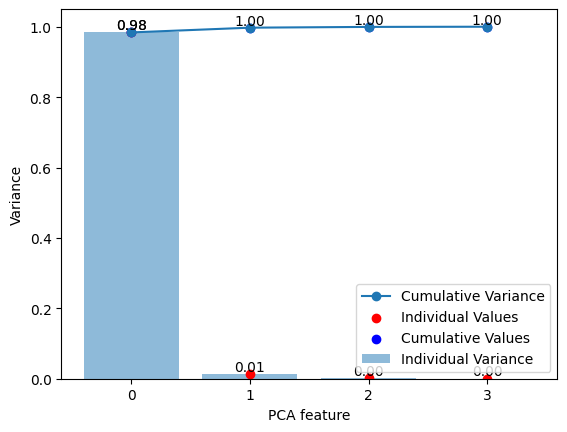

In [261]:
# Run a PCA and plot the explained variance ratio
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(X_standardized[['splus', 'shapley', 'miw_proportion', 'banzhaf']])
# Continue with PCA plot and feature selection

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, alpha=0.5, label='Individual Variance')
plt.plot(features, np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', label='Cumulative Variance')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.legend()

# Plot the data points
plt.scatter(features, pca.explained_variance_ratio_, c='red', label='Individual Values')
plt.scatter(features, np.cumsum(pca.explained_variance_ratio_), c='blue', label='Cumulative Values')

# Label each data point with its value
for i, var_ratio in enumerate(pca.explained_variance_ratio_):
    plt.text(features[i], var_ratio, f'{var_ratio:.2f}', ha='center', va='bottom')

for i, cum_var_ratio in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    plt.text(features[i], cum_var_ratio, f'{cum_var_ratio:.2f}', ha='center', va='bottom')

plt.legend()
plt.show()

# select the PCA feature 0 and add it to X
X['pivotalityPCA'] = pca.transform(X_standardized[['splus', 'shapley', 'miw_proportion', 'banzhaf']])[:, 0]
X.drop(['splus', 'shapley', 'miw_proportion', 'banzhaf'], axis=1, inplace=True)

In [262]:
import numpy as np
from sklearn.impute import KNNImputer


# Drop any rows with missing values (except for the left_righty column which we are going to impute for)
X.dropna(subset=X.columns.difference(['left_righty']), inplace=True)

imputer = KNNImputer(n_neighbors=12)
# Impute the missing values and create a new DataFrame with the imputed data
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
# Convert the standardized array back to a DataFrame
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)
X_standardized.describe()

,cabinet_proportion,seats_proportion,caretaker,sq_cabinet,sq_pm,left_rightx,left_righty,prime_minister,party_count,post_election,...,mingov,bicameral,lag_largest_parl,lag_largest_cab,B,B_star,C,D,E,pivotalityPCA
count,5.990000e+02,5.990000e+02,5.990000e+02,5.990000e+02,5.990000e+02,5.990000e+02,5.990000e+02,5.990000e+02,5.990000e+02,5.990000e+02,...,5.990000e+02,5.990000e+02,599.000000,5.990000e+02,5.990000e+02,5.990000e+02,5.990000e+02,5.990000e+02,5.990000e+02,5.990000e+02
mean,-2.965537e-17,5.782798e-17,-5.634521e-17,2.965537e-17,-8.896612e-18,-1.986910e-16,1.364147e-16,-1.482769e-17,1.364147e-16,1.008283e-16,...,7.710397e-17,-6.672459e-17,0.000000,-8.896612e-18,1.364147e-16,1.482769e-17,2.372430e-17,-3.558645e-17,-2.668984e-17,1.186215e-17
std,1.000836e+00,1.000836e+00,1.000836e+00,1.000836e+00,1.000836e+00,1.000836e+00,1.000836e+00,1.000836e+00,1.000836e+00,1.000836e+00,...,1.000836e+00,1.000836e+00,1.000836,1.000836e+00,1.000836e+00,1.000836e+00,1.000836e+00,1.000836e+00,1.000836e+00,1.000836e+00
min,-5.993038e-01,-1.090694e+00,-2.491119e-01,-7.239979e-01,-3.982554e-01,-2.023694e+00,-1.951478e+00,-3.982554e-01,-1.556630e+00,-4.355074e+00,...,-6.947469e-01,-1.046138e+00,-0.401064,-4.010645e-01,-8.233293e-01,-2.528699e-01,-2.375655e-01,-6.037091e-01,-6.165909e-01,-1.045162e+00
25%,-5.993038e-01,-7.460705e-01,-2.491119e-01,-7.239979e-01,-3.982554e-01,-8.150669e-01,-8.580546e-01,-3.982554e-01,-6.016065e-01,2.296172e-01,...,-6.947469e-01,-1.046138e+00,-0.401064,-4.010645e-01,-8.233293e-01,-2.528699e-01,-2.375655e-01,-6.037091e-01,-6.165909e-01,-7.336753e-01
50%,-5.993038e-01,-3.827400e-01,-2.491119e-01,-7.239979e-01,-3.982554e-01,2.334039e-01,1.041582e-01,-3.982554e-01,3.507600e-02,2.296172e-01,...,-6.947469e-01,9.558964e-01,-0.401064,-4.010645e-01,-8.233293e-01,-2.528699e-01,-2.375655e-01,-6.037091e-01,-6.165909e-01,-3.489950e-01
75%,3.253985e-01,5.414782e-01,-2.491119e-01,1.381219e+00,-3.982554e-01,8.235294e-01,7.602124e-01,-3.982554e-01,6.717585e-01,2.296172e-01,...,1.439373e+00,9.558964e-01,-0.401064,-4.010645e-01,1.214581e+00,-2.528699e-01,-2.375655e-01,1.656427e+00,1.621821e+00,3.406395e-01
max,3.684928e+00,2.900535e+00,4.014260e+00,1.381219e+00,2.510952e+00,2.098047e+00,2.116058e+00,2.510952e+00,3.855171e+00,2.296172e-01,...,1.439373e+00,9.558964e-01,2.493365,2.493365e+00,1.214581e+00,3.954604e+00,4.209365e+00,1.656427e+00,1.621821e+00,4.456852e+00


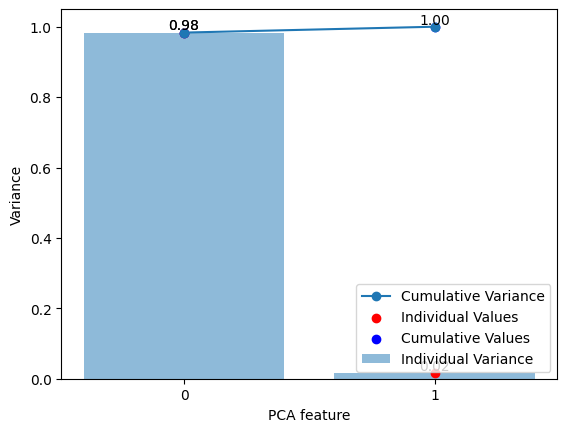

In [263]:
# Run a PCA and plot the explained variance ratio
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(X_standardized[['left_rightx', 'left_righty']])
# Continue with PCA plot and feature selection

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, alpha=0.5, label='Individual Variance')
plt.plot(features, np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', label='Cumulative Variance')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.legend()

# Plot the data points
plt.scatter(features, pca.explained_variance_ratio_, c='red', label='Individual Values')
plt.scatter(features, np.cumsum(pca.explained_variance_ratio_), c='blue', label='Cumulative Values')

# Label each data point with its value
for i, var_ratio in enumerate(pca.explained_variance_ratio_):
    plt.text(features[i], var_ratio, f'{var_ratio:.2f}', ha='center', va='bottom')

for i, cum_var_ratio in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    plt.text(features[i], cum_var_ratio, f'{cum_var_ratio:.2f}', ha='center', va='bottom')

plt.legend()
plt.show()

# select the PCA feature 0 and add it to X
X['ideologyPCA'] = pca.transform(X_standardized[['left_rightx', 'left_righty']])[:, 0]
X.drop(['left_rightx', 'left_righty'], axis=1, inplace=True)

In [264]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
Xvif = X.drop([target], axis=1)
vif["Feature"] = Xvif.columns
vif["VIF"] = [variance_inflation_factor(Xvif.values, i) for i in range(Xvif.shape[1])]

# Print the VIF values sorted from greatest to smallest
vif.sort_values(by='VIF', ascending=False)

print(vif)

             Feature        VIF
0   seats_proportion   6.406233
1          caretaker   1.497148
2         sq_cabinet   1.545953
3              sq_pm   3.466497
4     prime_minister   2.068824
5        party_count   2.263830
6      post_election   1.100188
7               enpp   5.143282
8             mingov   1.283760
9          bicameral   1.661905
10  lag_largest_parl   3.490514
11   lag_largest_cab   4.099416
12                 B  24.528687
13            B_star   1.243270
14                 C   4.329090
15                 D  21.971355
16                 E  32.967690
17     pivotalityPCA   6.790366
18       ideologyPCA   1.065084


In [265]:
X.describe()

,cabinet_proportion,seats_proportion,caretaker,sq_cabinet,sq_pm,prime_minister,party_count,post_election,enpp,mingov,bicameral,lag_largest_parl,lag_largest_cab,B,B_star,C,D,E,pivotalityPCA,ideologyPCA
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,0.139886,0.138947,0.058431,0.343907,0.136895,0.136895,8.889816,0.949917,4.846217,0.325543,0.522538,0.138564,0.138564,0.404007,0.060100,0.053422,0.267112,0.275459,0.140039,-1.186215e-17
std,0.233609,0.124582,0.234752,0.475407,0.344024,0.344024,3.143908,0.218300,1.548155,0.468969,0.499909,0.345780,0.345780,0.491109,0.237871,0.225062,0.442821,0.447119,2.014135,1.403558e+00
min,0.000000,0.003180,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.557285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.963300,-2.770061e+00
25%,0.000000,0.046078,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,3.712816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.336448,-1.162498e+00
50%,0.000000,0.091304,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.675471,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.562297,3.073212e-01
75%,0.215839,0.206349,0.000000,1.000000,0.000000,0.000000,11.000000,1.000000,5.477805,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.825559,1.011503e+00
max,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000,9.050684,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.109242,2.930340e+00


In [266]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from xgboost import XGBRegressor 

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

y = X[target]
X.drop([target], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [234]:
xgb_model = XGBRegressor()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'max_depth': [3, 4],
    'n_estimators': [1000],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Create an XGBoost model with the best parameters
best_xgb_model = XGBRegressor(**best_params)

# Fit the model to the training data with a validation dataset
best_xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=0)

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print("OOS R-squared Score:", r2)
print("Best Hyperparameters:", best_params)
print("OOS MSE:", -grid_search.best_score_)

y_pred = best_xgb_model.predict(X_train)
r22 = r2_score(y_train, y_pred)
print("In Sample R-squared Score:", r22)

/Users/sam/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


OOS R-squared Score: 0.7329330071678797
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
OOS MSE: 0.01564926388046726
In Sample R-squared Score: 0.838793560046194


Out of Sample R-squared Score: 0.6625881226930481
Best Hyperparameters: {'ccp_alpha': 0.0001, 'max_depth': 3}
Out of Sample MSE: 0.017491193895728417
In Sample R-squared Score: 0.741930849592642


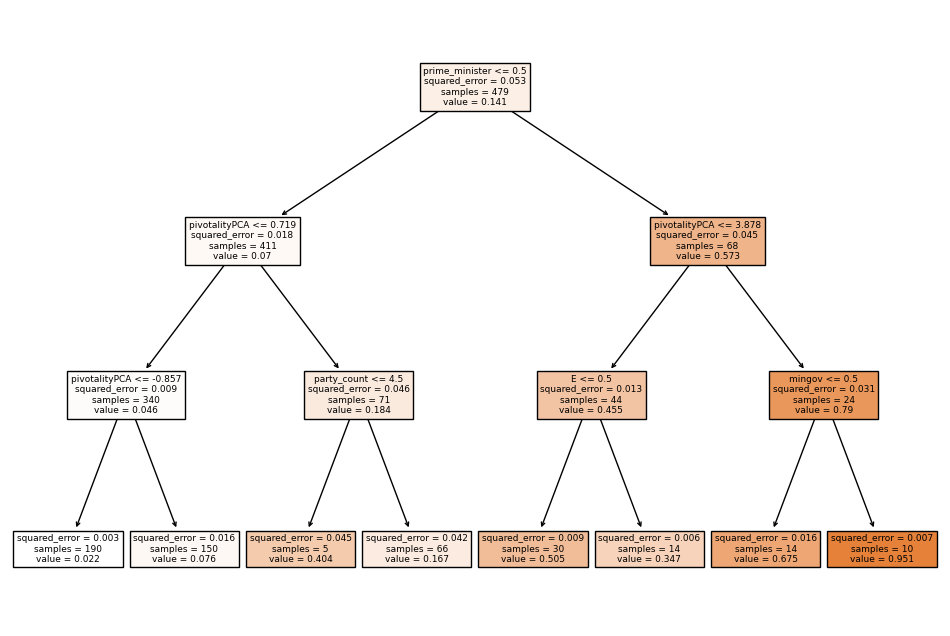

In [267]:

dtree = DecisionTreeRegressor()

# Define a range of alpha values for pruning
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
param_grid = {'ccp_alpha': alphas, 'max_depth': [3]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dtree, param_grid=param_grid, scoring='neg_mean_squared_error',cv=10)
grid_search.fit(X_train, y_train)
best_dtree = grid_search.best_estimator_

y_pred = best_dtree.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Out of Sample R-squared Score:", r2)
print("Best Hyperparameters:", grid_search.best_params_)
print("Out of Sample MSE:", -grid_search.best_score_)

y_pred = best_dtree.predict(X_train)
r22 = r2_score(y_train, y_pred)
print("In Sample R-squared Score:", r22)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_dtree, feature_names=X.columns, filled=True)
plt.show()

In [236]:
# try to find the MSE and R^2 of a model that predicts 0 for every observation
from sklearn.metrics import mean_squared_error
y_pred = [0] * len(y)
mse = mean_squared_error(y, y_pred)
print("MSE of predicting 0 for every observation:", mse)

MSE of predicting 0 for every observation: 0.07405019195871358


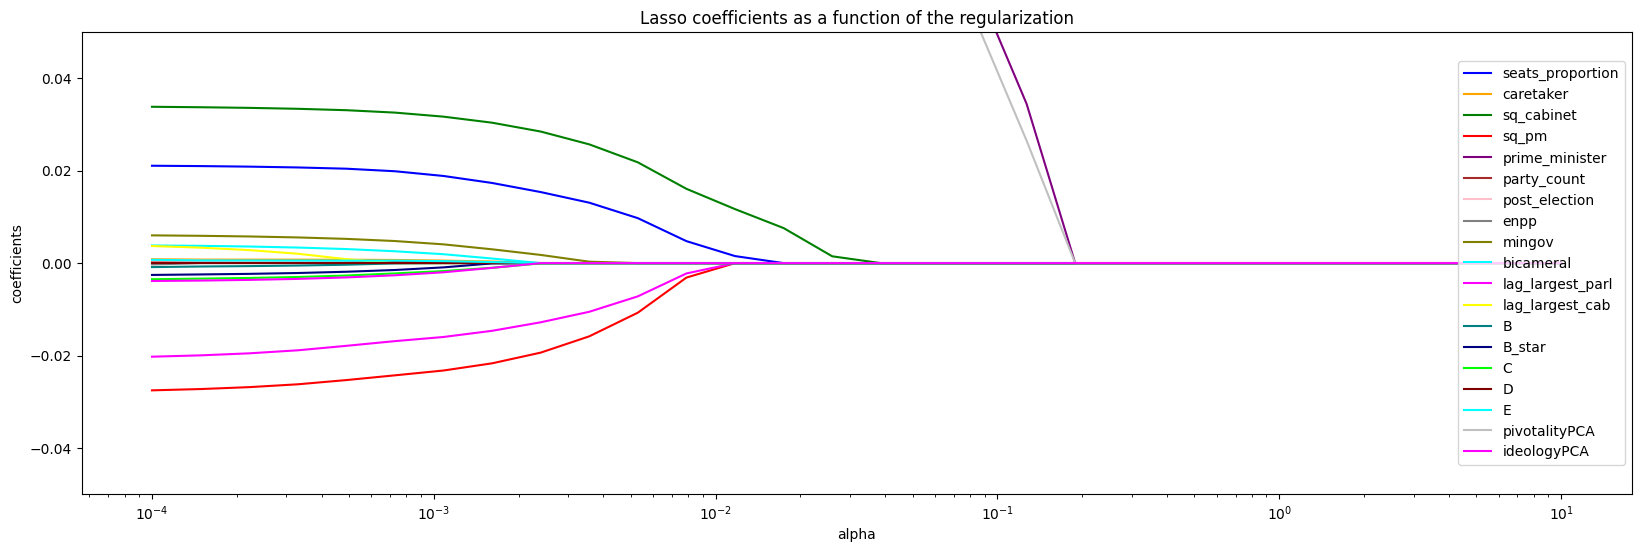

In [272]:
# Set a range of alpha values
alphas = np.logspace(-4, 1, 30)

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
# Convert the standardized array back to a DataFrame
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)
X_standardized.describe()

# Initialize an empty list to store coefficients for each alpha
coefs = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'navy', 'lime', 'maroon', 'aqua', 'silver', 'fuchsia', 'gold']

# Fit Lasso regression for each alpha and store coefficients
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_standardized, y)
    coefs.append(lasso.coef_)

# Plot the results
plt.figure(figsize=(20, 6))

ax = plt.gca()
lines = ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')

# Assign different colors to the lines representing each feature
for i, line in enumerate(lines):
    line.set_color(colors[i % len(colors)])

plt.legend(X.columns, loc='right')
plt.ylim([-0.05, 0.05])

plt.show()

In [273]:
zero_variables = []
seen_variable = []
for i, coef in enumerate(coefs):
    zero_indices = np.where(coef == 0)[0]
    zero_variables.extend(X.columns[zero_indices])

# Print the variables in the order that they reach 0
for variable in zero_variables:
    if variable not in seen_variable:
        seen_variable.append(variable)
        print(variable)

D
enpp
post_election
lag_largest_cab
B
caretaker
party_count
bicameral
B_star
E
ideologyPCA
C
mingov
sq_pm
lag_largest_parl
seats_proportion
sq_cabinet
prime_minister
pivotalityPCA


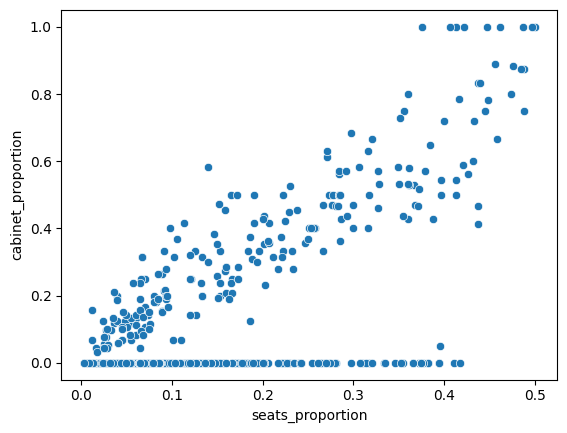

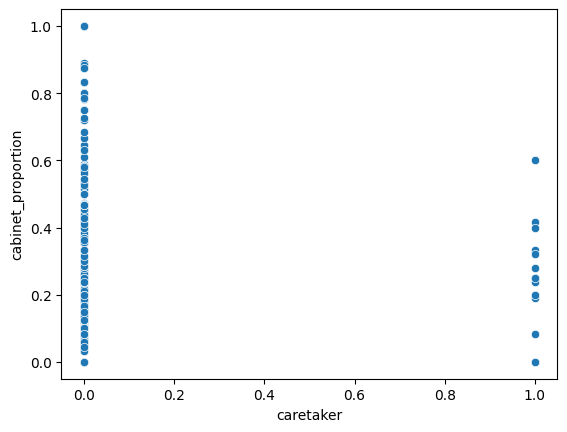

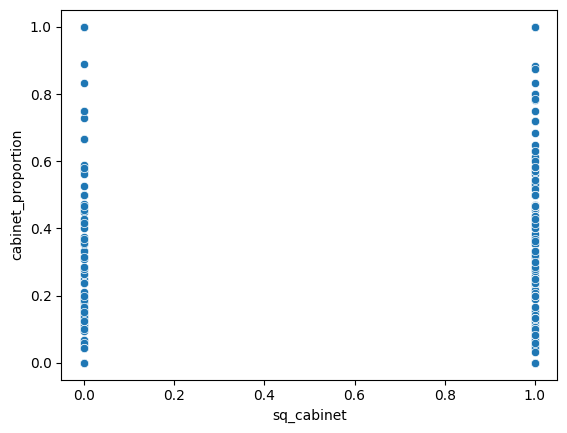

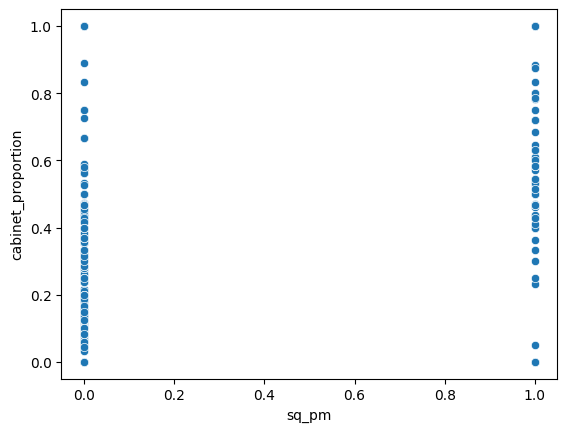

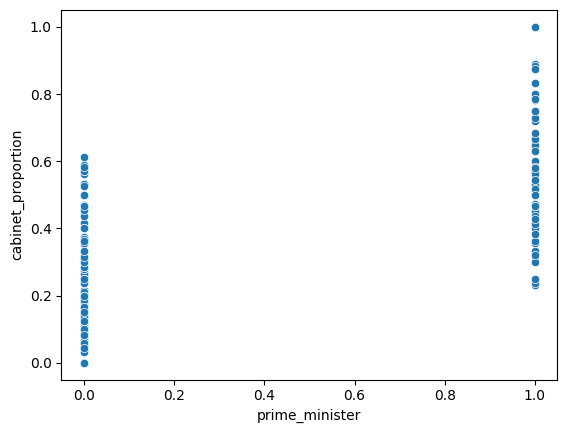

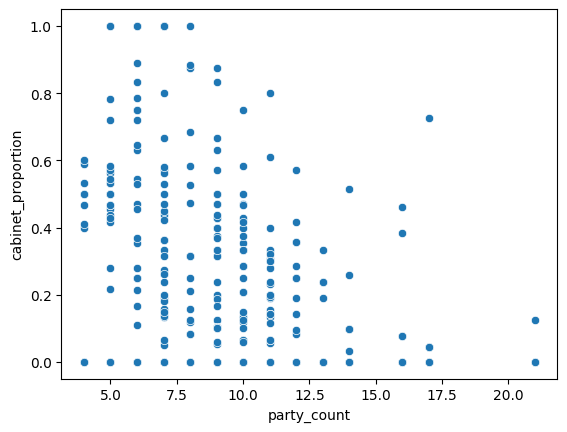

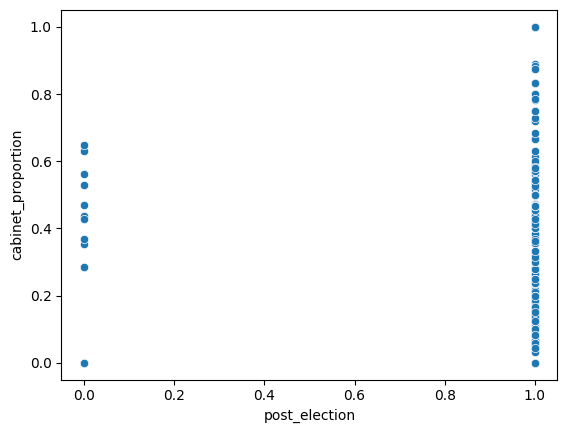

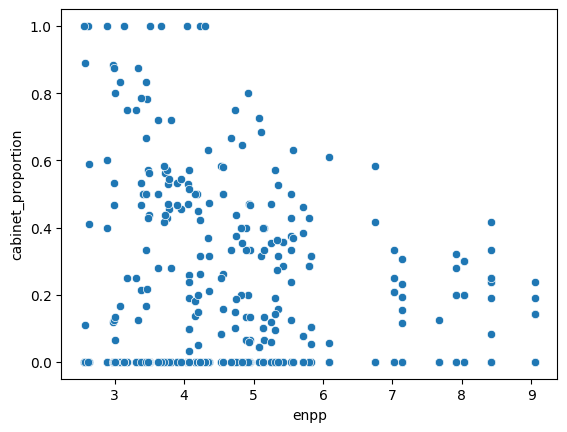

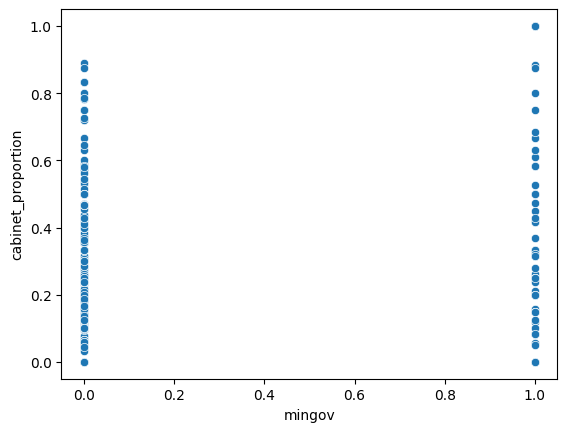

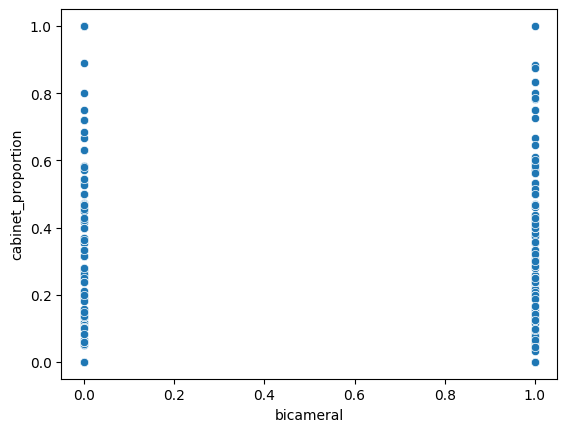

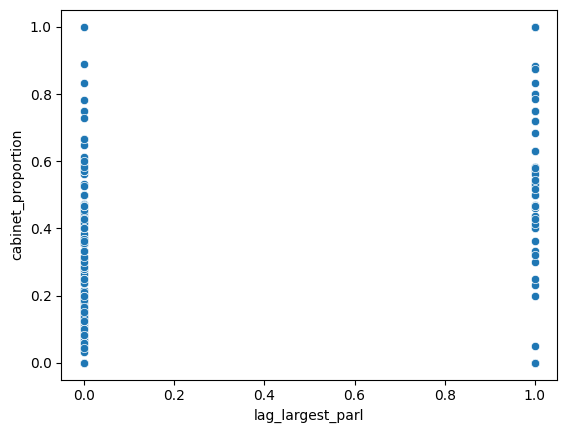

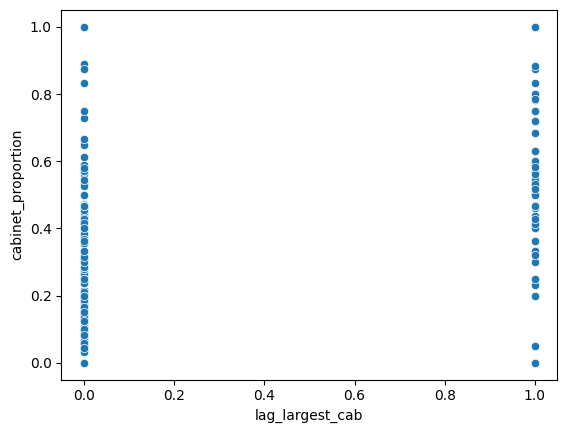

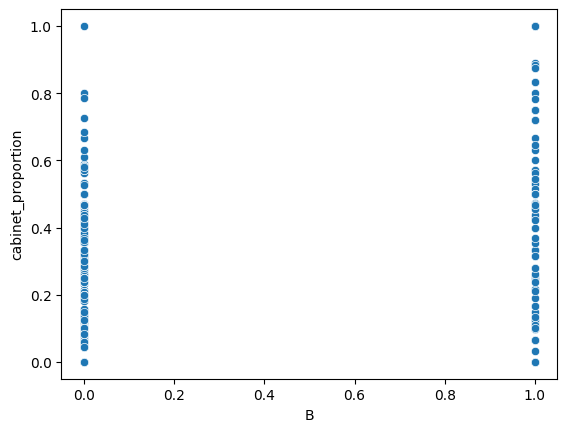

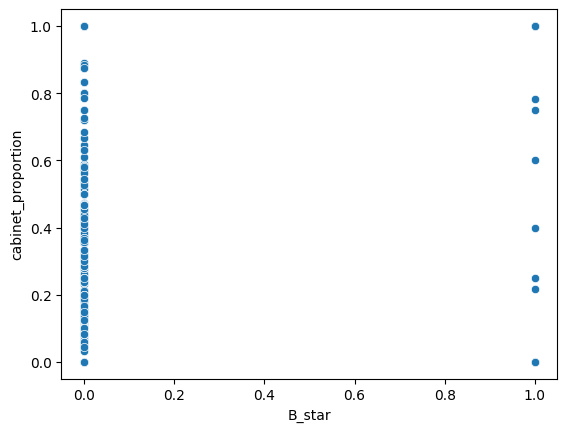

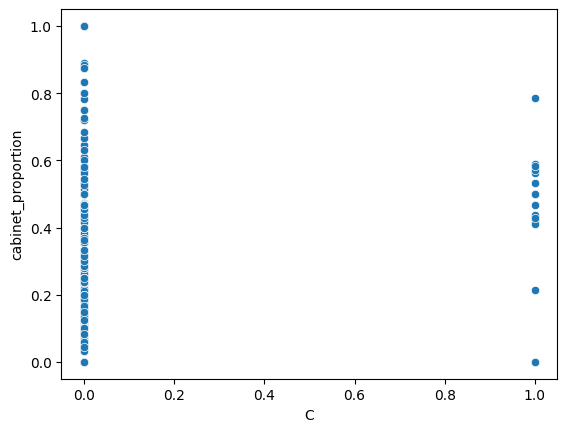

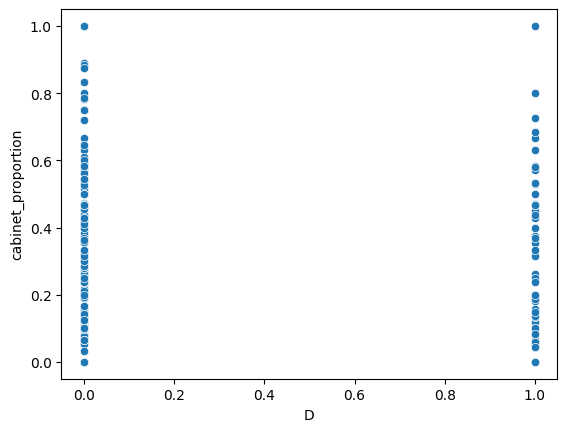

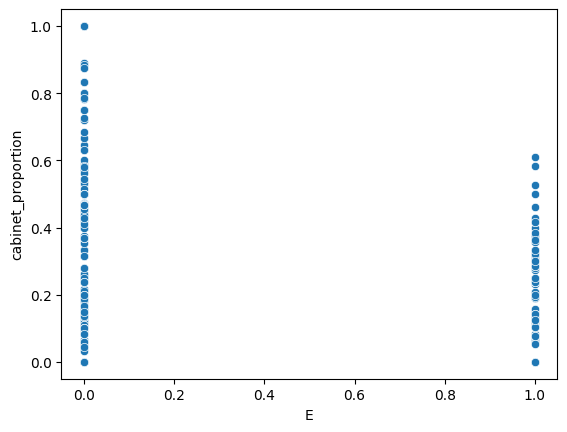

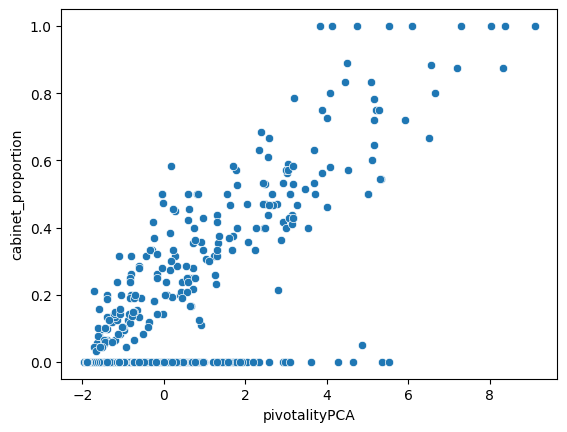

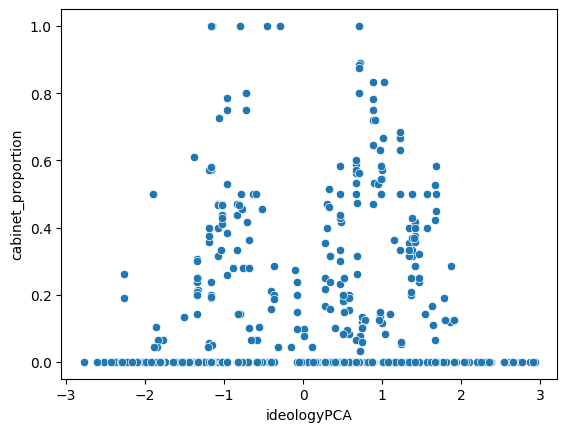

In [277]:
for col in X.columns:
    sns.scatterplot(x=X[col], y=y)
    plt.show()

In [281]:
X2 = X_standardized[['pivotalityPCA', 'prime_minister', 'sq_cabinet', 'seats_proportion']]
X2 = sm.add_constant(X2)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=10)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold

n_folds = 10

# Initialize an empty list to store the R-squared scores
r2_scores = []

# Initialize an empty list to store the MSE scores
mse_scores = []

# Initialize an empty list to store the model coefficients
coefficients = []

# Create a KFold object
kf = KFold(n_splits=n_folds, shuffle=True)

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X2):
    X_train_fold, X_test_fold = X2.iloc[train_index], X2.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Add the constant term to the training data
    X_train_fold = sm.add_constant(X_train_fold)

    # Create a linear regression model
    linear_model = LinearRegression()

    # Fit the model to the training data
    linear_model.fit(X_train_fold, y_train_fold)

    # Add the constant term to the test data
    X_test_fold = sm.add_constant(X_test_fold)

    # Predict the target variable for the test data
    y_pred_fold = linear_model.predict(X_test_fold)

    # Calculate the R-squared score for the fold
    r2_fold = r2_score(y_test_fold, y_pred_fold)

    # Calculate the MSE for the fold
    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)

    # Store the R-squared score and MSE for the fold
    r2_scores.append(r2_fold)
    mse_scores.append(mse_fold)

    # Store the model coefficients
    coefficients.append(linear_model.coef_)

# Calculate the average R-squared score and MSE across all folds
avg_r2_score = np.mean(r2_scores)
avg_mse_score = np.mean(mse_scores)

# Print the average R-squared score and MSE
print("Average R-squared score:", avg_r2_score)
print("Average Mean Squared Error:", avg_mse_score)

y_pred = linear_model.predict(X_test)
oos_r2 = r2_score(y_test, y_pred)
print("Out-of-Sample R-squared score:", oos_r2)


# Get the feature names
feature_names = X2.columns

# Initialize an empty list to store the average coefficients
avg_coefficients = []

# Calculate the average coefficient for each feature across all folds
for i in range(len(feature_names)):
    avg_coefficient = np.mean([coefficients[j][i] for j in range(n_folds)])
    avg_coefficients.append(avg_coefficient)

# Create the model string
model_string = "cabinet proportion = "
for i, feature in enumerate(feature_names):
    model_string += f"{avg_coefficients[i]:.3f}{feature} + "
model_string = model_string[:-3]  # Remove the last " + "

print(model_string)

Average R-squared score: 0.6627000631466908
Average Mean Squared Error: 0.01681318938366363
Out-of-Sample R-squared score: 0.6865136395896643
cabinet proportion = 0.000const + 0.089pivotalityPCA + 0.110prime_minister + 0.020sq_cabinet + 0.006seats_proportion
